# Adam


Created on the basis of RMSProp, Adam also uses EWMA on the mini-batch stochastic gradient[1]. Here, we are going to introduce this algorithm.

## The Algorithm

Adam uses the momentum variable $\boldsymbol{v}_t$ and variable $\boldsymbol{s}_t$, which is an EWMA on the squares of elements in the mini-batch stochastic gradient from RMSProp, and initializes each element of the variables to 0 at time step 0. Given the hyperparameter $0 \leq \beta_1 < 1$ (the author of the algorithm suggests a value of 0.9), the momentum variable $\boldsymbol{v}_t$ at time step $t$ is the EWMA of the mini-batch stochastic gradient $\boldsymbol{g}_t$:

$$\boldsymbol{v}_t \leftarrow \beta_1 \boldsymbol{v}_{t-1} + (1 - \beta_1) \boldsymbol{g}_t. $$

Just as in RMSProp, given the hyperparameter $0 \leq \beta_2 < 1$ (the author of the algorithm suggests a value of 0.999),
After taken the squares of elements in the mini-batch stochastic gradient, find $\boldsymbol{g}_t \odot \boldsymbol{g}_t$ and perform EWMA on it to obtain $\boldsymbol{s}_t$:

$$\boldsymbol{s}_t \leftarrow \beta_2 \boldsymbol{s}_{t-1} + (1 - \beta_2) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

Since we initialized elements in $\boldsymbol{v}_0$ and $\boldsymbol{s}_0$ to 0,
we get $\boldsymbol{v}_t =  (1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} \boldsymbol{g}_i$ at time step $t$. Sum the mini-batch stochastic gradient weights from each previous time step to get $(1-\beta_1) \sum_{i=1}^t \beta_1^{t-i} = 1 - \beta_1^t$. Notice that when $t$ is small, the sum of the mini-batch stochastic gradient weights from each previous time step will be small. For example, when $\beta_1 = 0.9$, $\boldsymbol{v}_1 = 0.1\boldsymbol{g}_1$. To eliminate this effect, for any time step $t$, we can divide $\boldsymbol{v}_t$ by $1 - \beta_1^t$, so that the sum of the mini-batch stochastic gradient weights from each previous time step is 1. This is also called bias correction. In the Adam algorithm, we perform bias corrections for variables $\boldsymbol{v}_t$ and $\boldsymbol{s}_t$:

$$\hat{\boldsymbol{v}}_t \leftarrow \frac{\boldsymbol{v}_t}{1 - \beta_1^t}, $$

$$\hat{\boldsymbol{s}}_t \leftarrow \frac{\boldsymbol{s}_t}{1 - \beta_2^t}. $$


Next, the Adam algorithm will use the bias-corrected variables $\hat{\boldsymbol{v}}_t$ and $\hat{\boldsymbol{s}}_t$ from above to re-adjust the learning rate of each element in the model parameters using element operations.

$$\boldsymbol{g}_t' \leftarrow \frac{\eta \hat{\boldsymbol{v}}_t}{\sqrt{\hat{\boldsymbol{s}}_t} + \epsilon},$$

Here, $\eta$ is the learning rate while $\epsilon$ is a constant added to maintain numerical stability, such as $10^{-8}$. Just as for Adagrad, RMSProp, and Adadelta, each element in the independent variable of the objective function has its own learning rate. Finally, use $\boldsymbol{g}_t'$ to iterate the independent variable:

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}_t'. $$

## Implementation from Scratch

We use the formula from the algorithm to implement Adam. Here, time step $t$ uses `hyperparams` to input parameters to the `adam` function.

In [49]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import d2l
import math
import torch

def init_adam_states():
    v_w, v_b = torch.zeros((features.shape[1], 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((features.shape[1], 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad
        s[:] = beta2 * s + (1 - beta2) * p.grad.square()
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (s_bias_corr.sqrt() + eps)
    hyperparams['t'] += 1

Use Adam to train the model with a learning rate of $0.01$.

UnboundLocalError: local variable 'optimizer' referenced before assignment

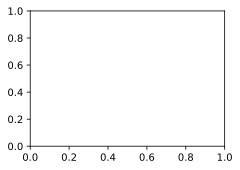

In [50]:
data_iter, feature_dim = d2l.get_data_ch10(batch_size=10)
d2l.train_ch10(torch.optim.Adam,{'lr': 0.01,'t':1}, data_iter, feature_dim);

## Summary

* Created on the basis of RMSProp, Adam also uses EWMA on the mini-batch stochastic gradient
* Adam uses bias correction.

## Exercises

* Adjust the learning rate and observe and analyze the experimental results.
* Some people say that Adam is a combination of RMSProp and momentum. Why do you think they say this?



